| Übungszettel 4 | Einführung in die Numerik |
|---|---|
| Dozent      | Prof. Kanschat |
| Tutoren     | S. Meggendorfer und J. Witte |
| Abgabe      | bis 13.05.21 23.15 Uhr |
| Studierende | Daniel Schiller, Thomas Blankenburg, Dennis Jakob |


---

### Aufgabe 1: Lagrange Interpolation

Seien Stützstellen `xi`, d.h. $x_0,\ldots,x_n$, gegeben.

1. Definieren Sie Funktionen `L(k, xi, x)` und `N(k, xi, x)`, die jeweils das $k$-te Lagrange-Basispolynom

$$L_k(x) = \prod_{j=0;j \neq k}^{n} \frac{x-x_j}{x_k-x_j}$$

bzw. $k$-te Newton-Basispolynom

$$N_k(x) = \prod_{j=0}^{k-1} (x-x_j)$$

an der Stelle `x` auswerten.

2. Lösen Sie die Interpolationsaufgabe zu diesen Stützstellen zur Funktion $f(x)=\tan(x)$ mit Funktionswerten `fi`, d.h. $f(x_0),\ldots,f(x_n)$,
    * indem Sie eine Auswertungsfunktion `pLagr(xi,fi,x)` bzgl. der Lagrange-Basis definieren.

    * indem Sie eine Auswertungsfunktion `pNewt(xi,ai,x)` bzgl. der Newton-Basis definieren. Berechnen Sie dazu rekursiv die Koeffizienten `ai`, d.h. $[x_0]f,[x_0,x_1]f,\ldots,[x_0,\ldots,x_n]f$, als dividierte Differenzen.

3. Plotten Sie die Lösungspolynome der beiden Interpolationsmöglichkeiten und vergleichen Sie mit dem Tangens. Diskutieren Sie Vor- und Nachteile der Lagrange-Basis bzw. der Newton-Basis.

4. **Bonus:** Verwenden Sie das Horner-Schema für `pNewt(xi,ai,x)`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import lru_cache

n = 10

xi = np.linspace(-1.5,1.5,n)
fi = np.tan(xi)

---

In [2]:
def L(k,xi,x):
    res = 1.
    for i in range(xi.size):
        if i != k:
            res *= (x - xi[i]) / (xi[k] - xi[i])
    return res
    

def pLagr(xi,fi,x):
    res = 0.
    for i in range(xi.size):
        res += fi[i] * L(i, xi, x)
    return res

In [3]:
def N(k,xi,x):
    res = 1.
    for i in range(k):
        res *= x - xi[i]
    return res

# without horner
def pNewt(xi,ai,x):
    res = 0.
    for i in range(xi.size):
        res += ai[i] * N(i, xi, x)
    return res

# with horner
def pNewtWithHorner(xi,ai,x):
    res = ai[-1]
    for i in range(xi.size - 2, -1, -1):
        res = res * (x - xi[i]) + ai[i]
    return res

#without caching
#def divDiff(xi, fi):
#    if xi.size == 1:
#        return fi[0]
#    else:
#        return (divDiff(xi[1: xi.size], fi[1: fi.size]) - divDiff(xi[0: xi.size - 1], fi[0: fi.size - 1])) / (xi[xi.size - 1] - xi[0])

def divDiff(xi, fi):
    @lru_cache(maxsize=None)
    def dd(s, e):
        if s == e:
            return fi[s]
        else:
            return (dd(s + 1, e) - dd(s, e - 1)) / (xi[e] - xi[s])
    return dd(0, xi.size - 1)

def aiKoeff(xi, fi):
    ai = np.zeros(xi.size)
    for i in range(xi.size):
        ai[i] = divDiff(xi[0: i + 1], fi[0: i + 1])
    return ai

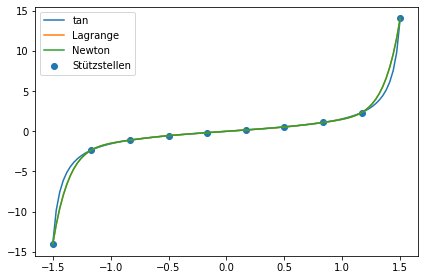

In [9]:
%matplotlib inline
# Plotten
plt.figure()
x = np.linspace(-1.5, 1.5, 100)

plt.scatter(xi, fi, label = 'Stützstellen')
plt.plot(x, np.tan(x), label = 'tan')
plt.plot(x, pLagr(xi, fi, x), label = 'Lagrange')
plt.plot(x, pNewt(xi, aiKoeff(xi, fi), x), label = 'Newton')
plt.legend(loc = 'best')
plt.tight_layout()

In den Bereichen mit geringer Steigung des Tangens stimmt die Interpolation mit dem Tang
In der Lagrange-Basis sind die Basispolynome schwerer auszurechnen und die Koeffizienten leichter. In der Newton-Basis sind die Basispolynome leicher zu bestimmen und die Koeffizienten schwerer.